In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
image_folder = '/Users/aviralchauhan/College/Sem7/ml/assignment-2/Image Dataset/data'
path = '/Users/aviralchauhan/College/Sem7/ml/assignment-2/Image Dataset/label.csv'
labels_df = pd.read_csv(path)

In [3]:
labels_df

filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]

In [4]:
labels = labels_df['label'].unique()

In [5]:
labels

array(['sitting', 'using_laptop', 'hugging', 'sleeping', 'drinking',
       'clapping', 'dancing', 'cycling', 'calling', 'laughing', 'eating',
       'fighting', 'listening_to_music', 'running', 'texting'],
      dtype=object)

In [6]:
images_per_class = {}

for index, row in labels_df.iterrows():
    label = row['label']
    filename = row['filename']
    if label not in images_per_class:
        images_per_class[label] = []
    images_per_class[label].append(filename)

In [7]:
num_images_per_class = {}

for key, val in images_per_class.items():
  label = key
  if label not in num_images_per_class:
    num_images_per_class[label] = len(images_per_class[label])

In [8]:
num_images_per_class

{'sitting': 840,
 'using_laptop': 840,
 'hugging': 840,
 'sleeping': 840,
 'drinking': 840,
 'clapping': 840,
 'dancing': 840,
 'cycling': 840,
 'calling': 840,
 'laughing': 840,
 'eating': 840,
 'fighting': 840,
 'listening_to_music': 840,
 'running': 840,
 'texting': 840}

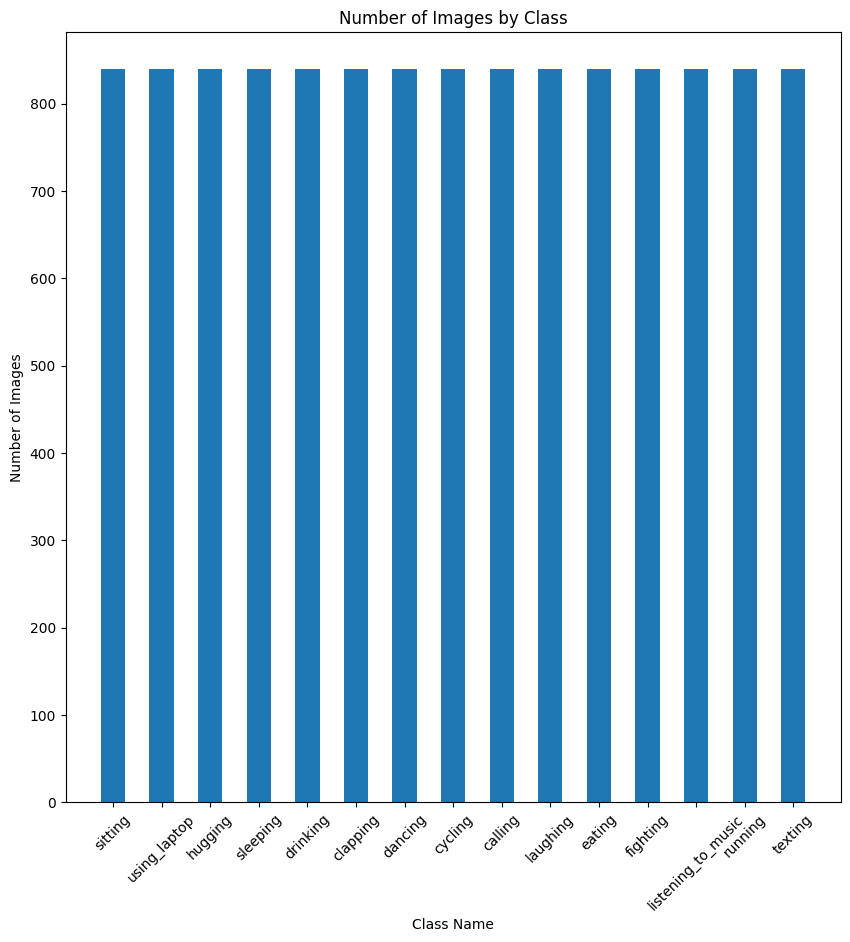

In [9]:
plt.figure(figsize=(10, 10))
plt.bar(num_images_per_class.keys(), num_images_per_class.values(), width = 0.5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('Number of Images');
plt.xticks(rotation=45)
plt.show()

In [10]:
image_widths = []
image_heights = []

counter=1
for filename in labels_df['filename']:
  image_path = os.path.join(image_folder, filename)
  with Image.open(image_path) as img:
    width, height = img.size
    print(f"{counter}> Image width: {width}, Image height: {height}")
    image_widths.append(width)
    image_heights.append(height)
    counter += 1

1> Image width: 240, Image height: 160
2> Image width: 275, Image height: 183
3> Image width: 275, Image height: 183
4> Image width: 275, Image height: 183
5> Image width: 240, Image height: 210
6> Image width: 126, Image height: 84
7> Image width: 263, Image height: 192
8> Image width: 262, Image height: 192
9> Image width: 183, Image height: 275
10> Image width: 299, Image height: 168
11> Image width: 275, Image height: 183
12> Image width: 232, Image height: 217
13> Image width: 231, Image height: 218
14> Image width: 267, Image height: 189
15> Image width: 284, Image height: 177
16> Image width: 284, Image height: 177
17> Image width: 300, Image height: 168
18> Image width: 276, Image height: 183
19> Image width: 262, Image height: 193
20> Image width: 266, Image height: 189
21> Image width: 262, Image height: 192
22> Image width: 291, Image height: 173
23> Image width: 262, Image height: 192
24> Image width: 183, Image height: 275
25> Image width: 225, Image height: 225
26> Image 

172> Image width: 275, Image height: 183
173> Image width: 194, Image height: 259
174> Image width: 275, Image height: 183
175> Image width: 260, Image height: 194
176> Image width: 275, Image height: 183
177> Image width: 275, Image height: 183
178> Image width: 225, Image height: 225
179> Image width: 275, Image height: 183
180> Image width: 266, Image height: 189
181> Image width: 260, Image height: 194
182> Image width: 262, Image height: 193
183> Image width: 275, Image height: 183
184> Image width: 275, Image height: 183
185> Image width: 276, Image height: 183
186> Image width: 300, Image height: 168
187> Image width: 212, Image height: 238
188> Image width: 225, Image height: 225
189> Image width: 275, Image height: 183
190> Image width: 84, Image height: 102
191> Image width: 266, Image height: 189
192> Image width: 204, Image height: 247
193> Image width: 265, Image height: 190
194> Image width: 299, Image height: 168
195> Image width: 275, Image height: 183
196> Image width:

In [11]:
image_size_df = pd.DataFrame({
    'Width': image_widths,
    'Height': image_heights
})

In [12]:
image_size_df.describe()

Width        Height
count  12600.000000  12600.000000
mean     260.381032    196.573571
std       39.919281     35.281402
min       84.000000     84.000000
25%      254.000000    181.000000
50%      275.000000    183.000000
75%      276.000000    194.000000
max      478.000000    318.000000

In [13]:
image_size_df.head()

Width  Height
0    240     160
1    275     183
2    275     183
3    275     183
4    240     210

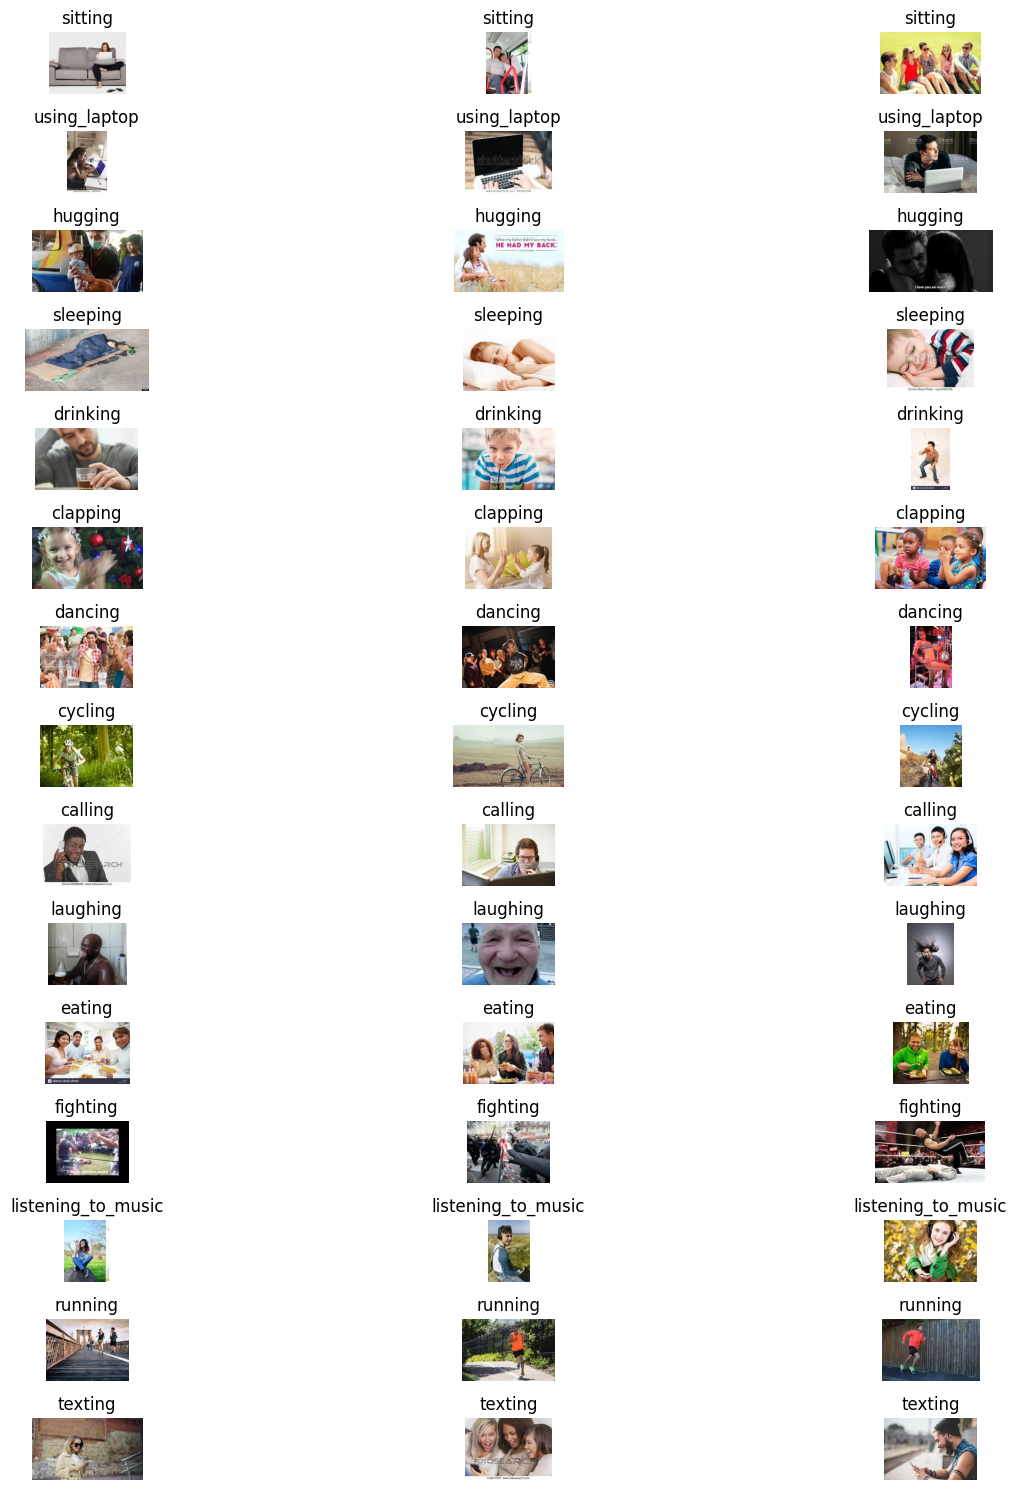

In [14]:
num_samples=3

plt.figure(figsize=(15, 15))
for i, class_name in enumerate(labels):
    class_images = labels_df[labels_df['label'] == class_name]['filename']
    sample_images = random.sample(list(class_images), num_samples)

    for j, img_filename in enumerate(sample_images):
        img_path = os.path.join(image_folder, img_filename)
        img = Image.open(img_path)
        plt.subplot(len(labels), num_samples, i * num_samples + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{class_name}")

plt.tight_layout()
plt.show()

In [15]:
print("Class Distribution:\n", num_images_per_class)

# Check for imbalance threshold
min_class_count = min(num_images_per_class.values())
max_class_count = max(num_images_per_class.values())

imbalance_ratio = max_class_count / min_class_count
print(f"Class Imbalance Ratio (Max/Min): {imbalance_ratio:.2f}")

Class Distribution:
 {'sitting': 840, 'using_laptop': 840, 'hugging': 840, 'sleeping': 840, 'drinking': 840, 'clapping': 840, 'dancing': 840, 'cycling': 840, 'calling': 840, 'laughing': 840, 'eating': 840, 'fighting': 840, 'listening_to_music': 840, 'running': 840, 'texting': 840}
Class Imbalance Ratio (Max/Min): 1.00


PART 2

In [16]:
!pip install opencv-python opencv-contrib-python

In [17]:
# import numpy as np
# from skimage.color import rgb2gray
# from skimage.transform import resize
# from skimage.feature import local_binary_pattern, hog
# from PIL import Image
# import os
# from skimage.feature import graycomatrix, graycoprops
# import cv2

# # Initialize lists to hold features and labels
# hog_features = []
# color_histograms = []
# lbp_features = []
# # glcm_features = []
# labels = []
# counter = 1

# fixed_size = (224, 224)  

# for _, row in labels_df.iterrows():
#     print(f"Processing file: {row['filename']} with label: {row['label']}")
#     image_path = os.path.join(image_folder, row['filename'])
#     label_text = row['label']

#     with Image.open(image_path) as img:
#         print(f"Counter: {counter}")
#         image = np.array(img)
#         print("Original image shape:", image.shape)

#         # Resize the image
#         image_resized = resize(image, fixed_size)

#         # Check if the image has 3 channels (RGB)
#         if len(image_resized.shape) == 3 and image_resized.shape[2] == 3:
#             print("Image has 3 channels. Converting to grayscale.")
#             image_resized_gray = rgb2gray(image_resized)
#             print("Image shape after converting to grayscale:", image_resized_gray.shape)

#             # # Normalize image to 8-bit range for GLCM
#             # image_resized_gray_8bit = (image_resized_gray * 255).astype('uint8')

#             # # Compute GLCM (Gray-Level Co-occurrence Matrix)
#             # glcm = graycomatrix(image_resized_gray_8bit, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

#             # # Extract GLCM properties
#             # contrast = graycoprops(glcm, 'contrast').mean()
#             # dissimilarity = graycoprops(glcm, 'dissimilarity').mean()
#             # homogeneity = graycoprops(glcm, 'homogeneity').mean()
#             # energy = graycoprops(glcm, 'energy').mean()
#             # correlation = graycoprops(glcm, 'correlation').mean()

#             # # Combine the GLCM features into a single array
#             # glcm_feature_vector = np.array([contrast, dissimilarity, homogeneity, energy, correlation])

#             # # Append GLCM features to the list
#             # glcm_features.append(glcm_feature_vector)
#             # print(f"GLCM features: {glcm_feature_vector}")

#             # Compute HOG features
#             features, hog_image = hog(
#                 image_resized_gray,
#                 block_norm='L2-Hys', pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True
#             )
#             print(f"HOG features shape: {features.shape}")

#             # Compute color histogram
#             histogram = cv2.calcHist([image_resized], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
#             histogram = cv2.normalize(histogram, histogram).flatten()
#             print(f"Color histogram shape: {histogram.shape}")

#             # Compute Local Binary Pattern (LBP)
#             lbp = local_binary_pattern(image_resized_gray, P=8, R=1, method='uniform')
#             (lbp_hist, _) = np.histogram(lbp.flatten(), bins=np.arange(0, 11), range=(0, 10))
#             lbp_hist = lbp_hist.astype("float")
#             lbp_hist /= lbp_hist.sum()  # Normalize
#             lbp_features.append(lbp_hist)
#             print(f"LBP features shape: {lbp_hist.shape}")

#             # Append all features
#             hog_features.append(features)
#             color_histograms.append(histogram)
#             glcm_features.append(glcm_feature_vector)
#             labels.append(label_text)

#         else:
#             print("Image does not have 3 channels or has an unsupported format, skipping...")
#             continue

#         counter += 1

# # Convert lists to numpy arrays
# hog_features = np.array(hog_features)
# color_histograms = np.array(color_histograms)
# lbp_features = np.array(lbp_features)
# # glcm_features = np.array(glcm_features)
# labels = np.array(labels)

# # features = [hog_features, color_histograms, lbp_features, glcm_features]

# print(f"Total images processed: {counter - 1}")
# print(f"HOG features size: {hog_features.shape}")
# print(f"Color histograms size: {color_histograms.shape}")
# print(f"LBP features size: {lbp_features.shape}")
# # print(f"GLCM features size: {glcm_features.shape}")
# print(f"Labels size: {labels.shape}")


import numpy as np
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import local_binary_pattern, hog
from PIL import Image
import os
import cv2

# Initialize lists to hold features and labels
hog_features = []
color_histograms = []
lbp_features = []
# glcm_features = []
labels = []
counter = 1

fixed_size = (224, 224)  

for _, row in labels_df.iterrows():
    print(f"Processing file: {row['filename']} with label: {row['label']}")
    image_path = os.path.join(image_folder, row['filename'])
    label_text = row['label']

    with Image.open(image_path) as img:
        print(f"Counter: {counter}")
        image = np.array(img)
        print("Original image shape:", image.shape)

        # Resize the image
        image_resized = resize(image, fixed_size)

        # Check if the image has 3 channels (RGB)
        if len(image_resized.shape) == 3 and image_resized.shape[2] == 3:
            print("Image has 3 channels. Converting to grayscale.")
            image_resized_gray = rgb2gray(image_resized)
            print("Image shape after converting to grayscale:", image_resized_gray.shape)

            # Convert to uint8 for OpenCV
            image_resized_uint8 = (image_resized * 255).astype(np.uint8)  # Scale to 255 for OpenCV

            # Compute HOG features
            features, hog_image = hog(
                image_resized_gray,
                block_norm='L2-Hys', pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True
            )
            print(f"HOG features shape: {features.shape}")

            # # Compute color histogram
            # histogram = cv2.calcHist([image_resized_uint8], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
            # histogram = cv2.normalize(histogram, histogram).flatten()
            # print(f"Color histogram shape: {histogram.shape}")
            
            # Compute color histogram
            histogram, _ = np.histogram(image_resized.flatten(), bins=256, range=(0, 1))
            histogram = histogram / histogram.sum()  # Normalize the histogram
            print(f"Color histogram shape: {histogram.shape}")

            # Compute Local Binary Pattern (LBP)
            lbp = local_binary_pattern(image_resized_gray, P=8, R=1, method='uniform')
            (lbp_hist, _) = np.histogram(lbp.flatten(), bins=np.arange(0, 11), range=(0, 10))
            lbp_hist = lbp_hist.astype("float")
            lbp_hist /= lbp_hist.sum()  # Normalize
            lbp_features.append(lbp_hist)
            print(f"LBP features shape: {lbp_hist.shape}")

            # Append all features
            hog_features.append(features)
            color_histograms.append(histogram)
            # glcm_features.append(glcm_feature_vector)  # Uncomment when GLCM is implemented
            labels.append(label_text)

        else:
            print("Image does not have 3 channels or has an unsupported format, skipping...")
            continue

        counter += 1

# Convert lists to numpy arrays
hog_features = np.array(hog_features)
color_histograms = np.array(color_histograms)
lbp_features = np.array(lbp_features)
# glcm_features = np.array(glcm_features)  # Uncomment when GLCM is implemented
labels = np.array(labels)

# features = [hog_features, color_histograms, lbp_features, glcm_features]  # Uncomment when GLCM is implemented

print(f"Total images processed: {counter - 1}")
print(f"HOG features size: {hog_features.shape}")
print(f"Color histograms size: {color_histograms.shape}")
print(f"LBP features size: {lbp_features.shape}")
# print(f"GLCM features size: {glcm_features.shape}")  # Uncomment when GLCM is implemented
print(f"Labels size: {labels.shape}")


Processing file: Image_1.jpg with label: sitting
Counter: 1
Original image shape: (160, 240, 3)
Image has 3 channels. Converting to grayscale.
Image shape after converting to grayscale: (224, 224)
HOG features shape: (6084,)
Color histogram shape: (256,)
LBP features shape: (10,)
Processing file: Image_2.jpg with label: using_laptop
Counter: 2
Original image shape: (183, 275, 3)
Image has 3 channels. Converting to grayscale.
Image shape after converting to grayscale: (224, 224)


/Users/aviralchauhan/College/Sem7/ml/assignment-2/ml2/lib/python3.12/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


HOG features shape: (6084,)
Color histogram shape: (256,)
LBP features shape: (10,)
Processing file: Image_3.jpg with label: hugging
Counter: 3
Original image shape: (183, 275, 3)
Image has 3 channels. Converting to grayscale.
Image shape after converting to grayscale: (224, 224)
HOG features shape: (6084,)
Color histogram shape: (256,)
LBP features shape: (10,)
Processing file: Image_4.jpg with label: sleeping
Counter: 4
Original image shape: (183, 275, 3)
Image has 3 channels. Converting to grayscale.
Image shape after converting to grayscale: (224, 224)
HOG features shape: (6084,)
Color histogram shape: (256,)
LBP features shape: (10,)
Processing file: Image_5.jpg with label: using_laptop
Counter: 5
Original image shape: (210, 240, 3)
Image has 3 channels. Converting to grayscale.
Image shape after converting to grayscale: (224, 224)
HOG features shape: (6084,)
Color histogram shape: (256,)
LBP features shape: (10,)
Processing file: Image_6.jpg with label: sleeping
Counter: 6
Origin

In [18]:
features = [hog_features, color_histograms, lbp_features]

feature_names = ['HOG', 'Color Histograms', 'LBP']

for i, feature in enumerate(features):
    print(f"Shape of {feature_names[i]} features: {feature.shape}")


Shape of HOG features: (12600, 6084)
Shape of Color Histograms features: (12600, 256)
Shape of LBP features: (12600, 10)


In [27]:
features = [hog_features, color_histograms, lbp_features]

preprocessed_features = []
for feature in features:
  scaler = StandardScaler()
  minmax_scaler = MinMaxScaler()
  feature_scaled = scaler.fit_transform(feature)
  feature_scaled = minmax_scaler.fit_transform(feature_scaled)
  preprocessed_features.append(feature_scaled)

combined_features = np.concatenate(preprocessed_features, axis=1)
print(f"Combined features size: {combined_features.shape}")


Combined features size: (12600, 6350)


PART 3

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

X = combined_features 
y = labels  

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# Encode the labels
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)
# y_test = label_encoder.transform(y_test)

print("Training and testing sets created successfully!")


X_train shape: (10080, 6350), y_train shape: (10080,)
Training and testing sets created successfully!


In [30]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Initialize the classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Naive Bayes): {accuracy:.2f}")

# Classification Report
print(metrics.classification_report(y_test, y_pred))

Accuracy (Naive Bayes): 0.25
                    precision    recall  f1-score   support

           calling       0.20      0.18      0.19       173
          clapping       0.22      0.34      0.26       160
           cycling       0.27      0.54      0.36       186
           dancing       0.34      0.21      0.26       180
          drinking       0.19      0.04      0.07       152
            eating       0.25      0.54      0.34       151
          fighting       0.30      0.22      0.25       186
           hugging       0.18      0.09      0.12       151
          laughing       0.31      0.28      0.29       179
listening_to_music       0.19      0.11      0.14       176
           running       0.26      0.18      0.21       155
           sitting       0.14      0.06      0.08       163
          sleeping       0.23      0.33      0.27       162
           texting       0.23      0.17      0.20       183
      using_laptop       0.27      0.42      0.33       163

         

In [31]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Decision Tree): {accuracy:.2f}")

# Classification Report
print(metrics.classification_report(y_test, y_pred))

Accuracy (Decision Tree): 0.14
                    precision    recall  f1-score   support

           calling       0.16      0.15      0.16       173
          clapping       0.07      0.07      0.07       160
           cycling       0.28      0.27      0.27       186
           dancing       0.18      0.16      0.17       180
          drinking       0.11      0.11      0.11       152
            eating       0.14      0.16      0.15       151
          fighting       0.22      0.19      0.20       186
           hugging       0.09      0.11      0.10       151
          laughing       0.15      0.14      0.15       179
listening_to_music       0.09      0.09      0.09       176
           running       0.14      0.17      0.15       155
           sitting       0.08      0.08      0.08       163
          sleeping       0.17      0.21      0.19       162
           texting       0.11      0.09      0.10       183
      using_laptop       0.15      0.15      0.15       163

       

In [32]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_classifier = RandomForestClassifier(criterion='gini', n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 2, max_depth= 20, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Random Forest): {accuracy:.2f}")

# Classification Report
print(metrics.classification_report(y_test, y_pred))

Accuracy (Random Forest): 0.29
                    precision    recall  f1-score   support

           calling       0.28      0.18      0.22       173
          clapping       0.38      0.21      0.27       160
           cycling       0.34      0.55      0.42       186
           dancing       0.42      0.43      0.43       180
          drinking       0.20      0.11      0.14       152
            eating       0.26      0.59      0.36       151
          fighting       0.29      0.39      0.33       186
           hugging       0.18      0.12      0.14       151
          laughing       0.29      0.28      0.29       179
listening_to_music       0.22      0.10      0.14       176
           running       0.30      0.28      0.29       155
           sitting       0.31      0.17      0.22       163
          sleeping       0.33      0.40      0.36       162
           texting       0.28      0.20      0.23       183
      using_laptop       0.25      0.39      0.30       163

       

In [25]:
# Perceptron Classifier
from sklearn.linear_model import Perceptron

# Initialize the classifier
perceptron = Perceptron()

# Train the classifier
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Perceptron): {accuracy:.2f}")

# Classification Report
print(metrics.classification_report(y_test, y_pred))

Accuracy (Perceptron): 0.21
                    precision    recall  f1-score   support

           calling       0.22      0.09      0.13       173
          clapping       0.15      0.24      0.18       160
           cycling       0.34      0.38      0.36       186
           dancing       0.27      0.33      0.30       180
          drinking       0.15      0.07      0.10       152
            eating       0.28      0.16      0.20       151
          fighting       0.42      0.18      0.26       186
           hugging       0.12      0.07      0.09       151
          laughing       0.27      0.19      0.22       179
listening_to_music       0.20      0.11      0.14       176
           running       0.26      0.26      0.26       155
           sitting       0.11      0.28      0.15       163
          sleeping       0.22      0.25      0.23       162
           texting       0.14      0.21      0.17       183
      using_laptop       0.27      0.32      0.29       163

          

In [ ]:
import pickle

with open('rf_classifier.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

print("Model saved to model.pkl")


Model saved to model.pkl


In [ ]:
# Load the model from the pickle file
with open('rf_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(X_test)

# Evaluate the accuracy of the loaded model 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")


Accuracy of the loaded model: 0.31
